# Assignment 3

In [46]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Task 1: MLE computation

As you know, we can think about linear regression from the optimization point of view (as the problem of minimizing the root mean squared error), but we can also consider it from the probabilistic point of view.
Let's consider the following equation:

\begin{equation*}
y_i=x_i \beta_0+\varepsilon_i
\end{equation*}

where $y_i$ is the dependent variable, $x_i$ is a $1 \times K$ vector of regressors, $\beta_0$ is the $K \times 1$ vector of regression coefficients to be estimated and $\varepsilon_i$ is an unobservable error term.

The sample is made up of $N$ IID observations $\left(y_i, x_i\right)$.
The regression equations can be also written as

\begin{equation*}
y=X \beta_0+\varepsilon
\end{equation*}

where the $N \times 1$ vector of observations of the dependent variable is denoted by $y$, the $N \times K$ matrix of regressors is denoted by $X$, and the $N \times 1$ vector of error terms is denoted by $\varepsilon$.

As everybody interested in probability theory knows, we always have to have some assumptions. In this case, we assume that the vector of errors $\varepsilon$ has a multivariate normal distribution conditional on $x$, with mean equal to 0 and covariance matrix equal to

\begin{equation*}
\sigma_0^2 I
\end{equation*}

where $I$ is the $N \times N$ identity matrix and

\begin{equation*}
\sigma_0^2=\operatorname{Var}\left[\varepsilon_i \mid X\right]
\end{equation*}

is the second parameter to be estimated.
Furthermore, it is assumed that the matrix of regressors $x$ has full-rank.

Those assumptions have interesting implications:
- the covariance matrix of $\varepsilon$ is diagonal implies that the entries of $\varepsilon$ are mutually independent (i.e., $\varepsilon_i$ is independent of $\varepsilon_j$ for $i \neq j$.)
- they all have a normal distribution with mean 0 and variance $\sigma_0^2$.

The fact that we transform normal random variables linearly makes the dependent variable $y_i$ conditionally normal, with mean $x_i \beta_0$ and variance $\sigma_0^2$. Therefore, its cdf is

\begin{equation*}
f_Y\left(y_i \mid X\right)=\left(2 \pi \sigma_0^2\right)^{-1 / 2} \exp \left(-\frac{1}{2} \frac{\left(y_i-x_i \beta_0\right)^2}{\sigma_0^2}\right)
\end{equation*}

Having this probability model we can use it to do estimation of regression parameters using Maximum Likelihood Estimation method.

The first-order conditions for a maximum are

\begin{equation*}
\begin{aligned}
& \nabla_\beta l\left(\beta, \sigma^2 ; y, X\right)=0 \\
& \frac{\partial}{\partial \sigma^2} l\left(\beta, \sigma^2 ; y, X\right)=0
\end{aligned}
\end{equation*}

where $\nabla_\beta$ indicates the gradient calculated with respect to $\beta$, that is, the vector of the partial derivatives of the log-likelihood with respect to the entries of $\beta$. The gradient is

\begin{equation*}
\begin{aligned}
& \nabla_\beta l\left(\beta, \sigma^2: y, X\right) \\
= & \nabla_\beta\left(-\frac{N}{2} \ln (2 \pi)-\frac{N}{2} \ln \left(\sigma^2\right)-\frac{1}{2 \sigma^2} \sum_{i=1}^N\left(y_i-x_i \beta\right)^2\right) \\
= & \frac{1}{\sigma^2} \sum_{i=1}^N x_i^{\top}\left(y_i-x_i \beta\right) \\
= & \frac{1}{\sigma^2}\left(\sum_{i=1}^N x_i^{\top} y_i-\sum_{i=1}^N x_i^{\top} x_i \beta\right) \\
= & \frac{1}{\sigma^2}\left(X^{\top} y-X^{\top} X \beta\right) \\
\end{aligned}
\end{equation*}

which is equal to zero only if

\begin{equation*}
\sum_{i=1}^N x_i^{\top} y_i-\sum_{i=1}^N x_i^{\top} x_i \beta=0
\end{equation*}


Therefore, the first of the two equations is satisfied if

\begin{equation*}
\beta=\left(\sum_{i=1}^N x_i^{\top} x_i\right)^{-1} \sum_{i=1}^N x_i^{\top} y_i=\left(X^{\top} X\right)^{-1} X^{\top} y
\end{equation*}

where we have used the assumption that $x$ has full rank and, as a consequence, $x^x x$ is invertible.


### Subtask A:
Prove that the MLE for variance is equal to
$$
\widehat{\sigma}_n^2=\frac{1}{N} \sum_{i=1}^N\left(y_i-x_i \widehat{\beta}_N\right)^2
$$

___

$$ 
\frac{\partial}{\partial \sigma^2} l\left(\beta, \sigma^2 ; y, X\right)=0 
$$

\begin{equation*}
\begin{aligned}
& \frac{\partial}{\partial \sigma^2} l\left(\beta, \sigma^2 ; y, X\right) \\
= & \frac{\partial}{\partial \sigma^2} \left(-\frac{N}{2} \ln (2 \pi)-\frac{N}{2} \ln \left(\sigma^2\right)-\frac{1}{2 \sigma^2} \sum_{i=1}^N\left(y_i-x_i \beta\right)^2\right) \\
= & -\frac{N}{2 \sigma^2}+\frac{1}{2 \sigma^4} \sum_{i=1}^N\left(y_i-x_i \beta\right)^2 \\
= & \frac{1}{2 \sigma^4} \left(\sum_{i=1}^N\left(y_i-x_i \beta\right)^2-N \sigma^2\right) \\
= & \frac{1}{2 \sigma^4} \left((y-X \beta)^{\top}(y-X \beta)-N \sigma^2\right) \\
\end{aligned}
\end{equation*}

which is equal to zero only if  

\begin{equation*}
\sum_{i=1}^N\left(y_i-x_i \beta\right)^2-N \sigma^2=0
\end{equation*}

thus

\begin{equation*}
\sigma^2=\frac{1}{N} \sum_{i=1}^N\left(y_i-x_i \beta\right)^2
\end{equation*}


### MLE for Logistic regression

In the logistic regression model, the output variable $y_i$ is a Bernoulli random variable (it can take only two values, either 1 or 0 ) and

\begin{equation*}
\mathrm{P}\left(y_i=1 \mid x_i\right)=S\left(x_i \beta\right)
\end{equation*}

where

\begin{equation*}
S(t)=\frac{1}{1+\exp (-t)}
\end{equation*}

is the logistic function, $x_i$ is a $1 \times K$ vector of inputs and $\beta$ is a $K \times 1$ vector of coefficients.

Furthermore,

\begin{equation*}
\mathrm{P}\left(y_i=0 \mid x_i\right)=1-S\left(x_i \beta\right)
\end{equation*}


The vector of coefficients $\beta$ is the parameter to be estimated by maximum likelihood.
We assume that the estimation is carried out with an IID sample comprising $N$ data points

\begin{equation*}
\left(y_i, x_i\right) \text { for } i=1, \ldots, N
\end{equation*}

### Subtask B
1. Find the form of the loglikelihood.
2. Compute the gradient of logistic function with respect to $\beta$

You can either tex your solution and put it in this notebook or attach photos of your solution.


#### 1. Find the form of the loglikelihood.

$$ P(y \mid x; \beta) = S(x\beta)^y (1-S(x\beta)^{1-y}) $$

$$ L(\beta) = P(y | x;\beta) $$
$$ = \prod_{i=1}^m P(y_i | x_i; \beta) $$
$$ = \prod_{i=1}^m S(x_i\beta)^{y_i} (1-S(x_i\beta)^{1-y_i}) $$

$$ l(\beta) = \ln L(\beta) $$
$$ = \ln \prod_{i=1}^m S(x_i\beta)^{y_i} (1-S(x_i\beta)^{1-y_i}) $$
$$ = \sum_{i=1}^m \ln S(x_i\beta)^{y_i} (1-S(x_i\beta)^{1-y_i}) $$
$$ = \sum_{i=1}^m y_i \ln S(x_i\beta) + (1-y_i) \ln (1-S(x_i\beta)) $$

We will maximize log likelihood (using gradient ascent) to find the best $\beta$.

#### 2. Compute the gradient of logistic function with respect to $\beta$
$$ \frac{\partial S(x\beta)}{\partial \beta} = \frac{\partial}{\partial \beta} \left(\frac{1}{1+\exp (-x\beta)}\right) $$
$$ = -\frac{1}{(1+\exp(-x\beta))^2} \frac{\partial}{\partial \beta}\exp(-x\beta) $$
$$ = \frac{\exp(-x\beta) x}{(1+\exp(-x\beta))^2} $$


## Task 2: Implement Logistic Regression

Use derivations form previous task to perform logistic regression. Provide a custom implemntation of gradient descent for this taks.
**Bonus points** provide also implementation of other optimization algorithm of your choice, eg. Newton-Rhapson method.


In [47]:
# prepare test data
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)

### Calculate the gradient of the log-likelihood
lets start with derivative of one test example $\beta^{(j)}$:  

$$ \frac{\partial l(\beta)}{\partial \beta^{(j)}} = \frac{\partial}{\partial \beta^{(j)}} y \ln S(x\beta) + (1-y) \ln (1-S(x\beta)) $$
$$ = (y \frac{1}{S(x\beta)} - (1-y) \frac{1}{1-S(x\beta)}) \frac{\partial S(x\beta)}{\partial \beta^{(j)}} $$
$$ = (y \frac{1}{S(x\beta)} - (1-y) \frac{1}{1-S(x\beta)}) S(x\beta)(1-S(x\beta)) \frac{\partial x\beta}{\partial \beta^{(j)}} $$
$$ = (y(1-S(x\beta)) - (1-y)S(x\beta))x^{(j)} $$
$$ = (y - S(x\beta))x^{(j)} $$

since

$$ \frac{\partial S(t)}{\partial t} = S(t)(1-S(t)) $$

now we end up with:  

$$ \beta^{(j)} = \beta^{(j)} + \alpha(y_i - S(x_i\beta)) x_i^{(j)} $$
$$ \beta = \beta + \alpha(y_i - S(x_i\beta)) x_i $$

#### Newton-Rhapson method
When we want to find global max of log-likelihood we can utilize the fact that there is only one extremum of log-likelihood function, so we will be looking for the root of the derivative of log-likelihood function. Newthon method simply starts at random point and iteratively moves to the root of the derivative of the function in that point. But that also means that we want to calculate second derivative of the log-likelihood function.

$$ \beta_{next} = \beta_{now} - \frac{l'(\beta_{now})}{l''(\beta_{now})} $$

generalized

$$ \beta = \beta - H^{-1} \nabla_\beta l(\beta) $$

(where H is hessian matrix and $\nabla_\beta l(\beta)$ is gradient of log-likelihood function)

lets calcualte second derivative of the log-likelihood function:
$$ \frac{\partial^2 l(\beta)}{\partial \beta^{(j)} \partial \beta^{(k)}} = \frac{\partial}{\partial \beta^{(j)}} (y - S(x\beta))x^{(k)} $$

$$ = yx^{(k)} - \frac{\partial S(x\beta)}{\partial \beta^{(k)}} $$
$$ = yx^{(k)} - S(x\beta)(1-S(x\beta)) \frac{\partial x\beta}{\partial \beta^{(k)}} $$
$$ = yx^{(k)} - S(x\beta)(1-S(x\beta)) x^{(k)} $$
$$ = x^{(k)}(y - S(x\beta) (1-S(x\beta))) $$

GD accuracy: 0.945
Newton accuracy: 0.96875


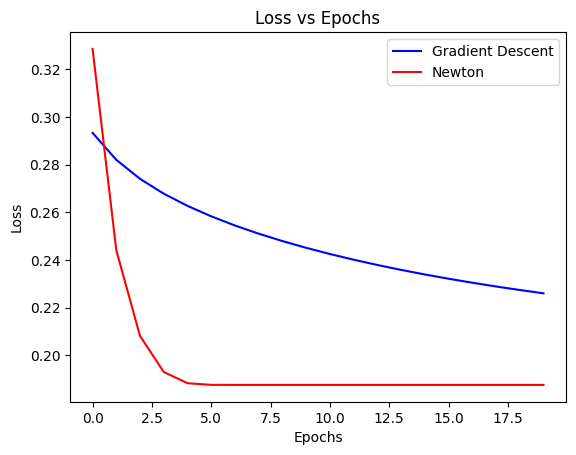

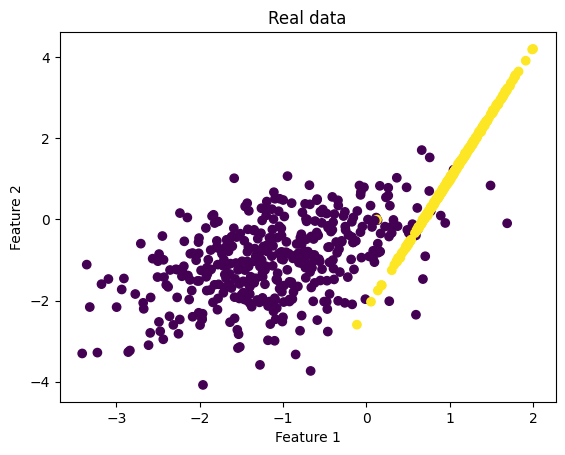

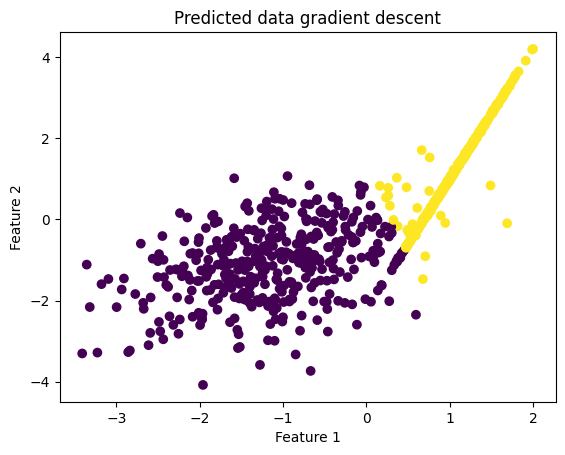

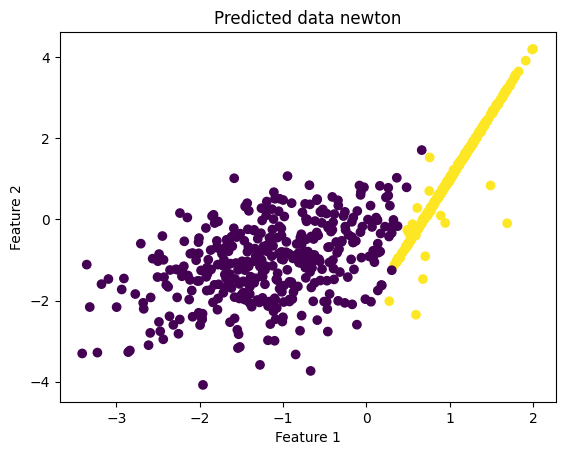

In [48]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=20):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def logistic_f(self, z):
        return 1 / (1 + np.exp(-z))
    
    def hypothesis(self, X):
        return self.logistic_f(np.dot(X, self.beta))
    
    def loss(self, y, y_predicted):
        eps = 1e-15
        return -np.mean(y * np.log(y_predicted + eps) + (1 - y) * np.log(1 - y_predicted + eps))
    
    def fit_GD(self, X, y):
        # 0-th coordinate is the bias term
        X = np.insert(X, 0, 1, axis=1)
        self.m, self.n = X.shape
        self.beta = np.zeros(self.n)

        loss = []

        for _ in range(self.epochs):
            # derivative of log likelihood wrt beta
            d_beta = np.dot(X.T, y - self.logistic_f(np.dot(X, self.beta)))

            # gradient ascent: beta = beta + alpha * d_beta
            self.beta += self.learning_rate * d_beta  

            y_predicted = self.logistic_f(np.dot(X, self.beta))
            loss.append(self.loss(y, y_predicted))
        
        return loss
    
    def fit_newton(self, X, y):
        # 0-th coordinate is the bias term
        X = np.insert(X, 0, 1, axis=1)
        self.m, self.n = X.shape
        self.beta = np.zeros(self.n)

        loss = []

        for _ in range(self.epochs):
            # derivative of log likelihood wrt beta
            d_beta = np.dot(X.T, y - self.logistic_f(np.dot(X, self.beta)))
            dd_beta = -np.dot(X.T, np.dot(np.diag(self.logistic_f(np.dot(X, self.beta)) * (1 - self.logistic_f(np.dot(X, self.beta)))), X))
            # dd_beta = np.dot(X.T, y - np.dot(self.logistic_f(np.dot(X, self.beta)), (1 - self.logistic_f(np.dot(X, self.beta)))))

            # Newton's method: beta = beta - d_beta / dd_beta
            self.beta -= np.dot(np.linalg.inv(dd_beta), d_beta)

            y_predicted = self.logistic_f(np.dot(X, self.beta))
            loss.append(self.loss(y, y_predicted))
        
        return loss

    def predict(self, X):
        X = np.insert(X, 0, 1, axis=1)
        linear_model = np.dot(X, self.beta)
        y_predicted = self.logistic_f(linear_model)
        return [1 if i > 0.5 else 0 for i in y_predicted]
    
    def predict_proba(self, X):
        X = np.insert(X, 0, 1, axis=1)
        linear_model = np.dot(X, self.beta)
        y_predicted = self.logistic_f(linear_model)
        return np.array([[1 - i, i] for i in y_predicted])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

# Train the model
lr_gd = LogisticRegression(learning_rate=0.01, epochs=20)
loss_gd = lr_gd.fit_GD(X_train, y_train)

lr_newton = LogisticRegression(learning_rate=0.01, epochs=20)
loss_newton = lr_newton.fit_newton(X_train, y_train)

# Predict on test data
y_pred_gd = lr_gd.predict(X_test)
y_pred_newton = lr_newton.predict(X_test)

# Evaluate the model
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

print("GD accuracy:", accuracy(y_test, y_pred_gd))
print("Newton accuracy:", accuracy(y_test, y_pred_newton))

# plot loss
plt.plot(loss_gd, 'b')
plt.plot(loss_newton, 'r')
plt.legend(['Gradient Descent', 'Newton'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.show()

# plot data vs prediction
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Real data')
plt.show()

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_gd)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Predicted data gradient descent')
plt.show()

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_newton)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Predicted data newton')
plt.show()

## Task 3: Classification for Imbalanced Data

Split the data using a technique suitable for imbalanced classes. Describe its working.

Train a logistic regression model on the below data.

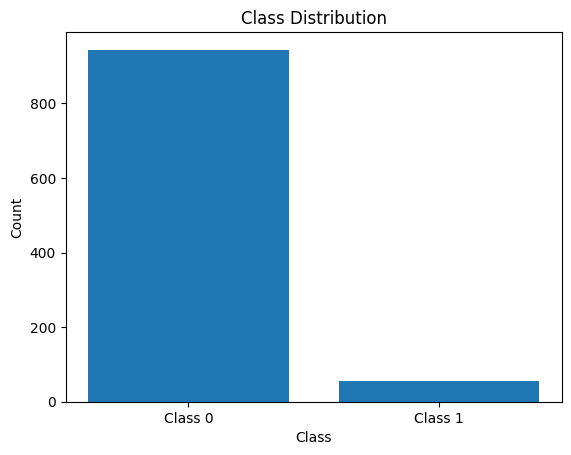

Dataset Shape: (1000, 20)
Class Distribution: [944  56]


In [49]:

# Create a synthetic dataset
X, y = make_classification(
    n_samples=1000,
    n_informative=4, n_redundant=5, n_features=20, n_clusters_per_class=3,
    n_classes=2,
    weights=[0.95, 0.05],
    random_state=42
)

# Visualize class distribution
def visualize_class_distribution(y):
    plt.bar(['Class 0', 'Class 1'], [sum(y == 0), sum(y == 1)])
    plt.title("Class Distribution")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.show()

visualize_class_distribution(y)

# Summarize dataset
print("Dataset Shape:", X.shape)
print("Class Distribution:", np.bincount(y))


Confusion Matrix:
 [[533 240]
 [163 575]]
Accuracy: 0.7332892124420913
Precision: 0.7055214723926381
Recall: 0.7791327913279132
F1 Score: 0.7405022537025112
ROC AUC: 0.7343270683677082


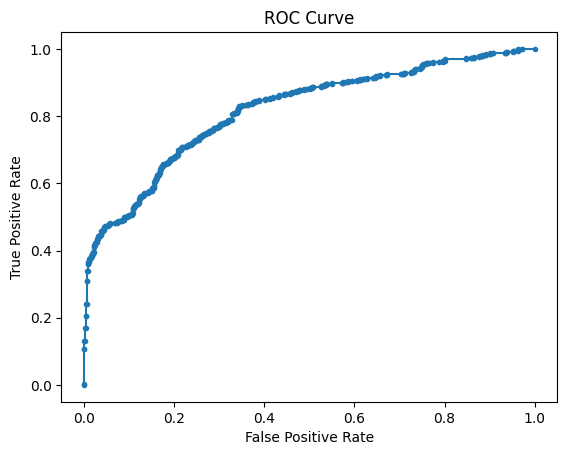

In [50]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.8, random_state=42)

# Train a logistic regression model
log_reg = SklearnLogisticRegression()
log_reg.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred_resampled = log_reg.predict(X_test_resampled)

# Evaluate the model
conf_matrix = confusion_matrix(y_test_resampled, y_pred_resampled)
accuracy = accuracy_score(y_test_resampled, y_pred_resampled)
precision = precision_score(y_test_resampled, y_pred_resampled)
recall = recall_score(y_test_resampled, y_pred_resampled)
f1 = f1_score(y_test_resampled, y_pred_resampled)
roc_auc = roc_auc_score(y_test_resampled, y_pred_resampled)

# Print evaluation metrics
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test_resampled, log_reg.predict_proba(X_test_resampled)[:, 1])
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Evaluate your binary classifiers using the following:
- confusion matrix,
- accuracy,
- precision,
- recall,
- F1 score,
- ROCAUC.

Please write custom functions calculating the above functions and plotting the receiver operating characteristic curve. Describe your intuition behind each metric and its suitability for imbalanced classes.



Custom Confusion Matrix:
 [[541 232]
 [169 569]]
Custom Accuracy: 0.7346128391793514
Custom Precision: 0.7103620474406991
Custom Recall: 0.7710027100271003
Custom F1 Score: 0.7394411955815464
Custom ROC AUC: 0.7354366719605101
-----------
Diff conf matrix:
 [[-8  8]
 [-6  6]]
Diff accuracy: -0.001323626737260053
Diff precision: -0.004840575048061013
Diff recall: 0.008130081300812941
Diff f1: 0.0010610581209647973
Diff roc auc: -0.0011096035928018777


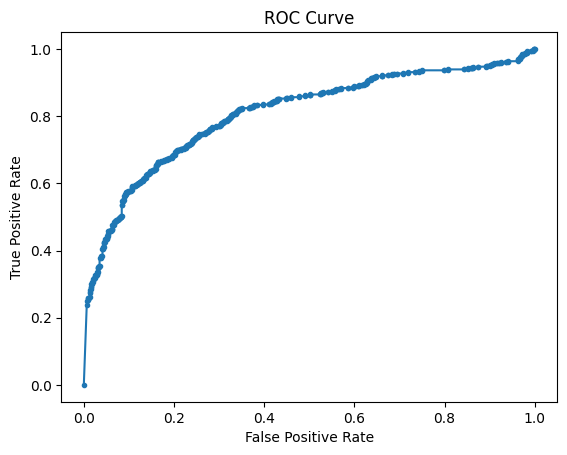

In [51]:
def confusion_matrix_custom(y_true, y_pred):
    tp = np.sum((y_true == 1) and (y_pred == 1))
    tn = np.sum((y_true == 0) and (y_pred == 0))
    fp = np.sum((y_true == 0) and (y_pred == 1))
    fn = np.sum((y_true == 1) and (y_pred == 0))
    return np.array([[tn, fp], [fn, tp]])

def accuracy_custom(y_true, y_pred):
    # how close are predictions to the actual values
    return np.sum(y_true == y_pred) / len(y_true)

def precision_custom(y_true, y_pred):
    # out of all positive predictions, how accurate are our predictions
    tp = np.sum((y_true == 1) and (y_pred == 1))
    fp = np.sum((y_true == 0) and (y_pred == 1))
    return tp / (tp + fp) if (tp + fp) > 0 else 0

def recall_custom(y_true, y_pred):
    # out of all actual positive values, how many did we predict correctly
    tp = np.sum((y_true == 1) and (y_pred == 1))
    fn = np.sum((y_true == 1) and (y_pred == 0))
    return tp / (tp + fn) if (tp + fn) > 0 else 0

def f1_score_custom(y_true, y_pred):
    # combination of precision and recall (harmonic mean)
    precision = precision_custom(y_true, y_pred)
    recall = recall_custom(y_true, y_pred)
    return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

def area_under_curve(x, y): # naive implementation
    auc = 0
    for i in range(1, len(x)):
        auc += (x[i] - x[i - 1]) * y[i]
    return auc

def roc_auc_custom(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    return area_under_curve(fpr, tpr)


# Train a logistic regression model
lr = LogisticRegression(learning_rate=0.05, epochs=20)
lr.fit_GD(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred_resampled = lr.predict(X_test_resampled)

# Evaluate the model
confusion_matrix_custom = confusion_matrix(y_test_resampled, y_pred_resampled)
accuracy_custom = accuracy_score(y_test_resampled, y_pred_resampled)
precision_custom = precision_score(y_test_resampled, y_pred_resampled)
recall_custom = recall_score(y_test_resampled, y_pred_resampled)
f1_score_custom = f1_score(y_test_resampled, y_pred_resampled)
roc_auc_custom = roc_auc_score(y_test_resampled, y_pred_resampled)

# Print evaluation metrics
print("Custom Confusion Matrix:\n", confusion_matrix_custom)
print("Custom Accuracy:", accuracy_custom)
print("Custom Precision:", precision_custom)
print("Custom Recall:", recall_custom)
print("Custom F1 Score:", f1_score_custom)
print("Custom ROC AUC:", roc_auc_custom)

print("-----------")
print("Diff conf matrix:\n", conf_matrix-confusion_matrix_custom)
print("Diff accuracy:", accuracy-accuracy_custom)
print("Diff precision:", precision-precision_custom)
print("Diff recall:", recall-recall_custom)
print("Diff f1:", f1-f1_score_custom)
print("Diff roc auc:", roc_auc-roc_auc_custom)


# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test_resampled, lr.predict_proba(X_test_resampled)[:, 1])
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Propose, describe and implement a technique for improving the model's ability to distinguish the classes. Evaluate your approach.

## Task 4: Optimization of Neural Networks

The **backpropagation algorithm** is the foundational algorithm in deep learning. In this task You will have to go through a single iteration of said algorithm and compare the results after updating networks weights. <br>
You are given a neural network with one input layer consisting of two input nodes ${n_1, n_2}$, one hidden layer with two neurons ${n_3, n_4}$ and an output layer with a single node $n_5$. We will denote the weight connecting $n_i$ to $n_j$ as $w_{i,j}$. A bias related to $n_i$ will be denoted as $b_i$. Parameters are initialized as follows:
* $w_{1,3} = 1.5$ ; $w_{2,3} = -2.5$ ; $b_{3} = 0.3$
* $w_{1,4} = 1$ ; $w_{2,4} = -2.5$ ; $b_{4} = 0.2$
* $w_{3,5} = 4$ ; $w_{4,5} = 3$ ; $b_{5} = -0.8$ <br>

Additionally, neurons $n_3$ and $n_4$ are equipped with the sigmoid activation function: $\sigma(x) = \frac{1}{1+e^{-x}} $<br>
Your task is to use two training examples: $x = \{ (1,2), (2,0)\}$, $y = \{-1, 6\}$ to preform a single backpropagation step - preform forward calculations and propagate the received error backwards, updating the weights. After all weights have been updated, check how the predictions change, preforming additional forward pass.

## Task 5: L1 & L2 Regularization for Logistic Regression

In this task we will use a synthetic dataset generated by the function `make_classification`.

1. Use a pairplot to see the relationships between the features in the dataset.
2. Apply your logistic regression model from Task 1 on this dataset and measure its accuracy.
3. Modify your implementation to account for two regularization methods: L1 and L2 and apply them to the dataset. What can you observe?
4. Which features are selected by L1 regularization? Plot the decision boundary for these features.

(If you have not done Task 1, use `LogisticRegression` from `sklearn` to see the effects of regularization. You can get half of the points for this task if you do that.)

In [ ]:

X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=5,
    n_redundant=5,
    n_classes=2,
    random_state=42
)

dataset = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(1, 21)])
dataset['Target'] = y